In [78]:
#Importamos librerias de interes
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt

# # Modulo 400

In [2]:
## Cargamos la base de datos del Modulo 400 de la ENAHO 2020 (formato DTA)
mod_400 = pd.read_stata("enaho01a-2020-400.dta")
mod_400

,aÑo,mes,conglome,vivienda,hogar,codperso,ubigeo,dominio,estrato,codinfor,...,i418h13,imputado,nivel,ticuest01a,tipocuestionario,tipoentrevista,factor07,factor_p,nconglome,sub_conglome
0,2020,01,005009,012,11,01,010101,sierra norte,de 20 000 a 49 999 habitantes,01,...,NaN,NaN,gastos en salud a nivel personal,cuestionario en tablet,cuestionario completo - antes de la emergencia...,presencial,149.202744,186.594391,007076,00
1,2020,01,005009,012,11,02,010101,sierra norte,de 20 000 a 49 999 habitantes,01,...,NaN,NaN,gastos en salud a nivel personal,cuestionario en tablet,cuestionario completo - antes de la emergencia...,presencial,149.202744,186.594391,007076,00
2,2020,01,005009,041,11,01,010101,sierra norte,de 20 000 a 49 999 habitantes,01,...,NaN,NaN,gastos en salud a nivel personal,cuestionario en tablet,cuestionario completo - antes de la emergencia...,presencial,149.202744,186.594391,007076,00
3,2020,01,005009,041,11,02,010101,sierra norte,de 20 000 a 49 999 habitantes,02,...,NaN,NaN,gastos en salud a nivel personal,cuestionario en tablet,cuestionario completo - antes de la emergencia...,presencial,149.202744,186.594391,007076,00
4,2020,01,005009,098,11,01,010101,sierra norte,de 20 000 a 49 999 habitantes,01,...,NaN,NaN,gastos en salud a nivel personal,cuestionario en tablet,cuestionario completo - antes de la emergencia...,presencial,149.202744,186.594391,007076,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120341,2020,12,020305,116,11,04,250301,selva,de 20 000 a 49 999 habitantes,04,...,NaN,NaN,gastos en salud a nivel personal,cuestionario en tablet,cuestionario completo - durante la emergencia ...,presencial,275.828552,379.820038,015122,00
120342,2020,12,020305,137,11,01,250301,selva,de 20 000 a 49 999 habitantes,01,...,NaN,NaN,gastos en salud a nivel personal,cuestionario en tablet,cuestionario completo - durante la emergencia ...,presencial,275.828552,379.820038,015122,00
120343,2020,12,020305,137,11,02,250301,selva,de 20 000 a 49 999 habitantes,02,...,NaN,NaN,gastos en salud a nivel personal,cuestionario en tablet,cuestionario completo - durante la emergencia ...,presencial,275.828552,379.820038,015122,00
120344,2020,12,020305,137,11,03,250301,selva,de 20 000 a 49 999 habitantes,01,...,NaN,NaN,gastos en salud a nivel personal,cuestionario en tablet,cuestionario completo - durante la emergencia ...,presencial,275.828552,379.820038,015122,00


## Construcción variable Seguro

In [33]:
mod_400['p4198'].value_counts() #muestro las categorias de la variable p4197

no      119988
otro       292
Name: p4198, dtype: int64

In [7]:
#Hago una copia de mi base ENAHO Modulo 400
copy_400 = mod_400.copy(deep = True) 

In [8]:
copy_400['Seguro_1'] = np.where(copy_400['p4191'] == "essalud", 1, 0)

C:\Users\JUANKY\AppData\Local\Temp/ipykernel_7964/1377744606.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  copy_400['Seguro_1'] = np.where(copy_400['p4191'] == "essalud", 1, 0)


In [9]:
copy_400['Seguro_2'] = np.where(copy_400['p4192'] == "seguro privado de salud", 1, 0)

C:\Users\JUANKY\AppData\Local\Temp/ipykernel_7964/1462886781.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  copy_400['Seguro_2'] = np.where(copy_400['p4192'] == "seguro privado de salud", 1, 0)


In [10]:
copy_400['Seguro_3'] = np.where(copy_400['p4193'] == "entidad prestadora de salud", 1, 0)

C:\Users\JUANKY\AppData\Local\Temp/ipykernel_7964/362061770.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  copy_400['Seguro_3'] = np.where(copy_400['p4193'] == "entidad prestadora de salud", 1, 0)


In [11]:
copy_400['Seguro_4'] = np.where(copy_400['p4194'] == "seguro ff.aa./policiales", 1, 0)

C:\Users\JUANKY\AppData\Local\Temp/ipykernel_7964/461845463.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  copy_400['Seguro_4'] = np.where(copy_400['p4194'] == "seguro ff.aa./policiales", 1, 0)


In [12]:
copy_400['Seguro_5'] = np.where(copy_400['p4195'] == "seguro integral de salud (sis)", 1, 0)

C:\Users\JUANKY\AppData\Local\Temp/ipykernel_7964/998221034.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  copy_400['Seguro_5'] = np.where(copy_400['p4195'] == "seguro integral de salud (sis)", 1, 0)


In [13]:
copy_400['Seguro_6'] = np.where(copy_400['p4196'] == "seguro universitario", 1, 0)

C:\Users\JUANKY\AppData\Local\Temp/ipykernel_7964/210108023.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  copy_400['Seguro_6'] = np.where(copy_400['p4196'] == "seguro universitario", 1, 0)


In [14]:
copy_400['Seguro_7'] = np.where(copy_400['p4197'] == "seguro escolar privado", 1, 0)

C:\Users\JUANKY\AppData\Local\Temp/ipykernel_7964/3531619601.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  copy_400['Seguro_7'] = np.where(copy_400['p4197'] == "seguro escolar privado", 1, 0)


In [36]:
copy_400['Seguro_8'] = np.where(copy_400['p4198'] == "otro", 1, 0)

In [39]:
copy_400['Seguro_8'].value_counts() #muestro las categorias de la variable creada
#Así verifico que se haya creado correctamente la dummy para cada variable

0    120054
1       292
Name: Seguro_8, dtype: int64

In [40]:
copy_400.head()

,aÑo,mes,conglome,vivienda,hogar,codperso,ubigeo,dominio,estrato,codinfor,...,nconglome,sub_conglome,Seguro_1,Seguro_2,Seguro_3,Seguro_4,Seguro_5,Seguro_6,Seguro_7,Seguro_8
0,2020,01,005009,012,11,01,010101,sierra norte,de 20 000 a 49 999 habitantes,01,...,007076,00,0,0,0,0,0,0,0,0
1,2020,01,005009,012,11,02,010101,sierra norte,de 20 000 a 49 999 habitantes,01,...,007076,00,0,0,0,0,0,0,0,0
2,2020,01,005009,041,11,01,010101,sierra norte,de 20 000 a 49 999 habitantes,01,...,007076,00,1,0,0,0,0,0,0,0
3,2020,01,005009,041,11,02,010101,sierra norte,de 20 000 a 49 999 habitantes,02,...,007076,00,0,0,0,0,0,0,0,0
4,2020,01,005009,098,11,01,010101,sierra norte,de 20 000 a 49 999 habitantes,01,...,007076,00,0,0,1,0,0,0,0,0


In [41]:
#Hago una copia de mi ultima base
final_400 = copy_400.copy(deep = True) 

In [42]:
#Genero la variable Seguro total (que es la suma de todas las variables seguro creadas anteriormente)
final_400['seguro_total'] = final_400.eval('Seguro_1 + Seguro_2 + Seguro_3 + Seguro_4 + Seguro_5 + Seguro_6 + Seguro_7 + Seguro_8')
final_400['seguro_total']

C:\Users\JUANKY\AppData\Local\Temp/ipykernel_7964/2615170819.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  final_400['seguro_total'] = final_400.eval('Seguro_1 + Seguro_2 + Seguro_3 + Seguro_4 + Seguro_5 + Seguro_6 + Seguro_7 + Seguro_8')


0         0
1         0
2         1
3         0
4         1
         ..
120341    0
120342    1
120343    1
120344    1
120345    1
Name: seguro_total, Length: 120346, dtype: int32

In [43]:
final_400['seguro_total'].value_counts() #muestro las categorias de la variable creada
#Así verifico si hay personas que cuentan con más de 1 tipo de seguro

1    94671
0    24351
2     1270
3       53
4        1
Name: seguro_total, dtype: int64

##Como hay personas que cuentan con más de un seguro, se creará una dummy que representará si cuenta o no con seguro
independientemente de si cuenta con más de 1.

In [44]:
#Hago una copia de mi ultima base
final2_400 = final_400.copy(deep = True) 

In [45]:
#Reemplazo los numeros de seguros mayor a 1 por 1 (Asi creo la dummy de aquellas personas quee cuentan con algun seguro)
grades = [0,1,2,3,4]
status = [0, 1, 1, 1, 1]

final2_400['seguro_dummy'] = final2_400['seguro_total'].replace(grades, status)
final2_400['seguro_dummy'].value_counts() #muestro las nuevas categorias

C:\Users\JUANKY\AppData\Local\Temp/ipykernel_7964/641997147.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  final2_400['seguro_dummy'] = final2_400['seguro_total'].replace(grades, status)


1    95995
0    24351
Name: seguro_dummy, dtype: int64

In [46]:
#Filtro la base modificada del modulo 400 de la ENAHO para quedarme con algunas variables
modified_400 = final2_400[['mes', 'conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'dominio', 'estrato', 'codinfor', 'seguro_dummy']]
modified_400

,mes,conglome,vivienda,hogar,codperso,ubigeo,dominio,estrato,codinfor,seguro_dummy
0,01,005009,012,11,01,010101,sierra norte,de 20 000 a 49 999 habitantes,01,0
1,01,005009,012,11,02,010101,sierra norte,de 20 000 a 49 999 habitantes,01,0
2,01,005009,041,11,01,010101,sierra norte,de 20 000 a 49 999 habitantes,01,1
3,01,005009,041,11,02,010101,sierra norte,de 20 000 a 49 999 habitantes,02,0
4,01,005009,098,11,01,010101,sierra norte,de 20 000 a 49 999 habitantes,01,1
...,...,...,...,...,...,...,...,...,...,...
120341,12,020305,116,11,04,250301,selva,de 20 000 a 49 999 habitantes,04,0
120342,12,020305,137,11,01,250301,selva,de 20 000 a 49 999 habitantes,01,1
120343,12,020305,137,11,02,250301,selva,de 20 000 a 49 999 habitantes,02,1
120344,12,020305,137,11,03,250301,selva,de 20 000 a 49 999 habitantes,01,1


# # Modulo 500

In [ ]:
#Instalamos librerias de interes
pip install pyreadstat
pip install matplotlib

In [47]:
#Cargamos la base de datos del Modulo 500 de la ENAHO 2020 (formato SAV)
mod_500 = pd.read_spss("Enaho01A-2020-500.sav")
mod_500.head()

,AÑO,MES,CONGLOME,VIVIENDA,HOGAR,CODPERSO,UBIGEO,DOMINIO,ESTRATO,CODINFOR,...,OCU500,OCUPINF,EMPLPSEC,FAC500A,FAC500_P,TICUEST01A,TIPOCUESTIONARIO,TIPOENTREVISTA,NCONGLOME,SUB_CONGLOME
0,2020,01,005009,012,11,01,010101,Sierra Norte,De 20 000 a 49 999 habitantes,01,...,Ocupado,Empleo formal,NaN,109.029137,153.650513,Cuestionario en Tablet,Cuestionario completo - Antes de la emergencia...,presencial,007076,00
1,2020,01,005009,012,11,02,010101,Sierra Norte,De 20 000 a 49 999 habitantes,01,...,Ocupado,Empleo Informal,Empleo informal en el sector informal,181.484161,184.611094,Cuestionario en Tablet,Cuestionario completo - Antes de la emergencia...,presencial,007076,00
2,2020,01,005009,041,11,01,010101,Sierra Norte,De 20 000 a 49 999 habitantes,01,...,Ocupado,Empleo Informal,Empleo informal en el sector informal,103.218079,153.650513,Cuestionario en Tablet,Cuestionario completo - Antes de la emergencia...,presencial,007076,00
3,2020,01,005009,041,11,02,010101,Sierra Norte,De 20 000 a 49 999 habitantes,02,...,Ocupado,Empleo Informal,Empleo informal fuera del sector informal,153.179947,234.997851,Cuestionario en Tablet,Cuestionario completo - Antes de la emergencia...,presencial,007076,00
4,2020,01,005009,098,11,01,010101,Sierra Norte,De 20 000 a 49 999 habitantes,01,...,No PEA,NaN,NaN,123.571358,176.217352,Cuestionario en Tablet,Cuestionario completo - Antes de la emergencia...,presencial,007076,00


In [48]:
#Verificamos los nombres de las columnas
mod_500.columns

Index(['AÑO', 'MES', 'CONGLOME', 'VIVIENDA', 'HOGAR', 'CODPERSO', 'UBIGEO',
       'DOMINIO', 'ESTRATO', 'CODINFOR',
       ...
       'OCU500', 'OCUPINF', 'EMPLPSEC', 'FAC500A', 'FAC500_P', 'TICUEST01A',
       'TIPOCUESTIONARIO', 'TIPOENTREVISTA', 'NCONGLOME', 'SUB_CONGLOME'],
      dtype='object', length=1414)

In [49]:
#Se convierte los nombres de las columnas en minuscula
mod_500.columns = mod_500.columns.str.lower()

In [52]:
#Filtro el modulo 500 de la ENAHO para quedarme con algunas variables
modified_500= mod_500[['mes', 'conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'codinfor', 'ocu500', 'p207']]
modified_500

,mes,conglome,vivienda,hogar,codperso,ubigeo,codinfor,ocu500,p207
0,01,005009,012,11,01,010101,01,Ocupado,Mujer
1,01,005009,012,11,02,010101,01,Ocupado,Mujer
2,01,005009,041,11,01,010101,01,Ocupado,Mujer
3,01,005009,041,11,02,010101,02,Ocupado,Mujer
4,01,005009,098,11,01,010101,01,No PEA,Hombre
...,...,...,...,...,...,...,...,...,...
91310,12,020305,073,11,01,250301,01,Ocupado,Hombre
91311,12,020305,116,11,01,250301,01,Ocupado,Hombre
91312,12,020305,116,11,02,250301,02,No PEA,Mujer
91313,12,020305,137,11,01,250301,01,Ocupado,Hombre


# MERGE

In [53]:
#Se realiza el merge a partir de la base modificada del modulo 400 de la ENAHO con la base modificada del modulo 500
resultado_merge = pd.merge(modified_400,
                     modified_500,
                    left_on = ['mes', 'conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'codinfor'],
                    right_on = ['mes', 'conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'codinfor'],
                    how = 'left')
resultado_merge

,mes,conglome,vivienda,hogar,codperso,ubigeo,dominio,estrato,codinfor,seguro_dummy,ocu500,p207
0,01,005009,012,11,01,010101,sierra norte,de 20 000 a 49 999 habitantes,01,0,Ocupado,Mujer
1,01,005009,012,11,02,010101,sierra norte,de 20 000 a 49 999 habitantes,01,0,Ocupado,Mujer
2,01,005009,041,11,01,010101,sierra norte,de 20 000 a 49 999 habitantes,01,1,Ocupado,Mujer
3,01,005009,041,11,02,010101,sierra norte,de 20 000 a 49 999 habitantes,02,0,Ocupado,Mujer
4,01,005009,098,11,01,010101,sierra norte,de 20 000 a 49 999 habitantes,01,1,No PEA,Hombre
...,...,...,...,...,...,...,...,...,...,...,...,...
120341,12,020305,116,11,04,250301,selva,de 20 000 a 49 999 habitantes,04,0,NaN,NaN
120342,12,020305,137,11,01,250301,selva,de 20 000 a 49 999 habitantes,01,1,Ocupado,Hombre
120343,12,020305,137,11,02,250301,selva,de 20 000 a 49 999 habitantes,02,1,Ocupado,Mujer
120344,12,020305,137,11,03,250301,selva,de 20 000 a 49 999 habitantes,01,1,NaN,NaN


In [54]:
#Verifico que estén todas las variables de las 2 bases que hicieron el merge
resultado_merge.columns

Index(['mes', 'conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo', 'dominio',
       'estrato', 'codinfor', 'seguro_dummy', 'ocu500', 'p207'],
      dtype='object')

In [55]:
#Generamos variable departamento
resultado_merge["dpto"] = resultado_merge["ubigeo"].str[0:2]
resultado_merge["dpto"] = resultado_merge["dpto"].replace({ "01": "Amazonas","02": "Ancash","03": "Apurimac","04":"Arequipa","05": "Ayacucho",
                                            "06": "Cajamarca","07": "Callao","08": "Cusco","09": "Huancavelica","10":"Huanuco", 
                                            "11": "Ica","12":"Junin", "13": "La Libertad","14": "Lambayeque","15":"Lima",
                                            "16": "Loreto","17":"Madre de Dios","18": "Moquegua","19":"Pasco","20":"Piura",
                                            "21": "Puno","22":"San Martin","23":"Tacna","24":"Tumbes","25":"Ucayali"
                                            })
resultado_merge['dpto']

0         Amazonas
1         Amazonas
2         Amazonas
3         Amazonas
4         Amazonas
            ...   
120341     Ucayali
120342     Ucayali
120343     Ucayali
120344     Ucayali
120345     Ucayali
Name: dpto, Length: 120346, dtype: object

In [56]:
#Filtro la base de datos (merge) para quedarme con aquellas personas con trabajo
cond= resultado_merge['ocu500'] == "Ocupado"

final = resultado_merge[cond]

In [57]:
#Verificamos las categorias que posee la variable ocu500
final['ocu500'].value_counts() 

Ocupado               55240
0.0                       0
Desocupado abierto        0
Desocupado oculto         0
No PEA                    0
Name: ocu500, dtype: int64

In [58]:
#Elimino ciertas categorias de la variable ocu500 
final['ocu500'].replace(to_replace=['Desocupado abierto', 'Desocupado oculto', 'No PEA'],value=np.NAN,inplace=True)

C:\Users\JUANKY\miniconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [59]:
#Elimino las observaciones con missings
final.replace({0:np.nan}, inplace = True) 

C:\Users\JUANKY\miniconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [60]:
final.head()

,mes,conglome,vivienda,hogar,codperso,ubigeo,dominio,estrato,codinfor,seguro_dummy,ocu500,p207,dpto
0,01,005009,012,11,01,010101,sierra norte,de 20 000 a 49 999 habitantes,01,NaN,Ocupado,Mujer,Amazonas
1,01,005009,012,11,02,010101,sierra norte,de 20 000 a 49 999 habitantes,01,NaN,Ocupado,Mujer,Amazonas
2,01,005009,041,11,01,010101,sierra norte,de 20 000 a 49 999 habitantes,01,1.0,Ocupado,Mujer,Amazonas
3,01,005009,041,11,02,010101,sierra norte,de 20 000 a 49 999 habitantes,02,NaN,Ocupado,Mujer,Amazonas
5,01,005009,098,11,02,010101,sierra norte,de 20 000 a 49 999 habitantes,02,1.0,Ocupado,Mujer,Amazonas


# #Formato Wide

In [61]:
#Nº de trabajadores por departamento que cuentan con seguro de salud
primera_tabla = final.pivot_table(index='dpto', columns='ocu500', values='seguro_dummy', aggfunc='sum')
primera_tabla #lo pongo en formato wide

ocu500,Ocupado
dpto,
Amazonas,2032.0
Ancash,2135.0
Apurimac,1688.0
Arequipa,1467.0
Ayacucho,1727.0
Cajamarca,2207.0
Callao,961.0
Cusco,1942.0
Huancavelica,2054.0


## Grafico 

<AxesSubplot:xlabel='dpto'>

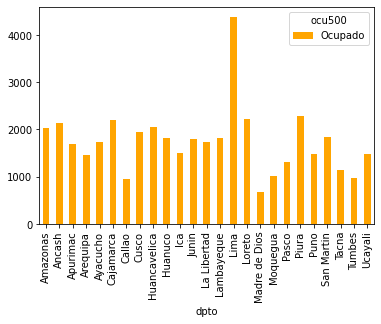

In [77]:
primera_tabla.plot(kind='bar', color = 'orange')

In [ ]:
https://www.youtube.com/watch?v=O4538i9MQEc&ab_channel=JonathanSoma
https://www.tutorialkart.com/matplotlib-tutorial/matplotlib-pyplot-bar-plot-different-colors-for-bars/#:~:text=To%20set%20different%20colors%20for,parameter%20of%20bar()%20function.&text=Of%20course%2C%20there%20are%20other,only%20color%20parameter%20is%20given.
    
https://stackoverflow.com/questions/15998491/how-to-convert-ipython-notebooks-to-pdf-and-html